In [9]:
import pandas as pd
import numpy as np
from numpy.random import seed
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
airbnb = pd.read_csv(r"C:\Users\darre\OneDrive\Desktop\Capstone Project One\NYC_Airbnb_New_Data.csv")

In [52]:
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753620,-73.983770,Entire home/apt,225,...,0.0,1.0,7,1125,48,11/21/2009,11/4/2019,94.0,0.39,365
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685140,-73.959760,Entire home/apt,89,...,1.0,4.0,1,730,307,9/30/2014,2/8/2020,90.0,4.69,137
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.747670,-73.975000,Entire home/apt,200,...,1.0,1.0,3,21,78,4/20/2009,10/13/2019,90.0,0.59,0
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.686880,-73.955960,Private room,60,...,1.0,1.0,29,730,50,5/28/2009,12/2/2019,90.0,0.38,365
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.764890,-73.984930,Private room,79,...,1.0,1.0,2,14,463,5/6/2009,1/28/2020,84.0,3.53,216
5,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.801780,-73.967230,Private room,79,...,1.0,1.0,2,14,118,9/7/2009,7/21/2017,98.0,0.93,0
6,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.713440,-73.990370,Entire home/apt,150,...,1.0,2.0,1,1125,161,9/1/2009,7/29/2019,94.0,1.27,49
7,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.760760,-73.988670,Private room,99,...,1.0,1.0,2,7,210,3/12/2009,2/9/2020,97.0,1.58,10
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.668290,-73.987790,Private room,89,...,1.0,0.0,4,14,177,4/23/2009,1/27/2020,94.0,1.34,347
9,6021,Wonderful Guest Bedroom in Manhattan CENTRAL PARK,11528,Claudio,Manhattan,Upper West Side,40.798260,-73.961130,Private room,85,...,1.0,1.0,2,730,123,5/10/2009,12/9/2019,93.0,0.94,350


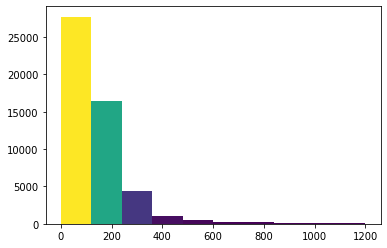

In [77]:
#Histogram of prices
N, bins, patches = plt.hist(airbnb.price,bins=10, range = [0, 1200])
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.show()

In [18]:
# Finding the standard deviation and mean of price
std = np.std(airbnb.price)
mean = np.mean(airbnb.price)
print("Standard Deviation: ", std)
print("Mean: ",  mean)

Standard Deviation:  373.6302189992497
Mean:  160.24050335636144


In [31]:
# Finding the Confidence Intervals of price
print("Standard Deviation: ", std)
print("Mean: ", mean)
n = len(airbnb)
x = std/np.sqrt(n)
deg = 2.262
a = (x*deg)
CI_Upper = mean + a
CI_Lower = mean - a
print("Confidence Interval Upper: ",CI_Upper,"Confidence Interval Lower: ",CI_Lower)

Standard Deviation:  373.6302189992497
Mean:  160.24050335636144
Confidence Interval Upper:  163.97934347164528 Confidence Interval Lower:  156.5016632410776


In [34]:
# Finding the confidence intervals using bootstrap
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, sz=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(sz)

    # Generate replicates
    for i in range(sz):
        bs_replicates[i] = bootstrap_replicate_1d(data,func )

    return bs_replicates


N_rep = 10000
bs_replicates = draw_bs_reps(airbnb.price, np.mean, 10000)
conf_int = np.percentile(bs_replicates, [2.5,97.5])
print(conf_int)

[157.03476134 163.60173249]


373.5583332556616
[237.34577721 273.89685824]
1.0


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


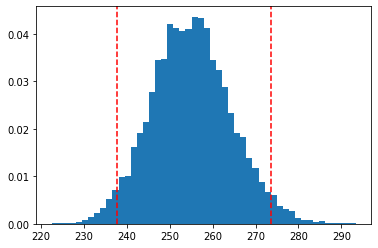

In [148]:
# Calculation of 95% confidence interval of difference between accomodations with rooms of 2 and less and 
# accomodations with rooms with 3 or more over 10000 replicates

big_accomodation = airbnb[airbnb.bedrooms.ge(3)] 
std_big = np.std(big_accomodation.price)
small_accomodation = airbnb[airbnb.bedrooms.le(2)]
std_small = np.std(small_accomodation.price)

dif = std_big - std_small

std_count = np.std(np.concatenate((big_accomodation.price,small_accomodation.price)))

print(std_count)
large_bedroom_shifted = big_accomodation.price - np.std(big_accomodation.price) + std_count
small_bedrooms_shifted = small_accomodation.price - np.std(small_accomodation.price) + std_count

bs_replicates = draw_bs_reps(large_bedroom_shifted, np.mean, 10000)
conf_int_large = np.percentile(bs_replicates,[2.5,97.5])
print(conf_int_large)

_ = plt.hist(bs_replicates, normed=True, bins=50)
_ = plt.axvline(237.67994473,color='r', linestyle='--')
_ = plt.axvline(273.5845753,color='r', linestyle='--')

p = np.sum(bs_replicates >= dif) / len(bs_replicates)
print(p)

[157.02803928 163.3771128 ]
1.0


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


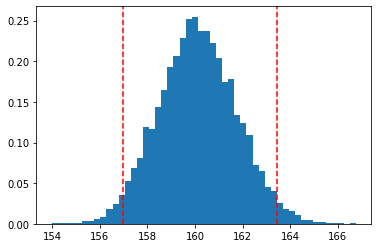

In [149]:
bs_replicates = draw_bs_reps(small_bedrooms_shifted, np.mean, 10000)
conf_int_small = np.percentile(bs_replicates,[2.5,97.5])
print(conf_int_small)

_ = plt.hist(bs_replicates, normed=True, bins=50)
_ = plt.axvline(156.97965465,color='r', linestyle='--')
_ = plt.axvline(163.44155129,color='r', linestyle='--')

p = np.sum(bs_replicates >= dif) / len(bs_replicates)
print(p)

In [96]:
entire_home = airbnb[airbnb['room_type'] == 'Entire home/apt']
std = np.std(entire_home.price)
mean = np.mean(entire_home.price)
print("Standard Deviation of accomodations that are Entire Homes: ", std)
print("Mean of accomodations that are Entire Homes: ",  mean)

n = len(airbnb)
x = std/np.sqrt(n)
deg = 2.262
a = (x*deg)
CI_Upper = mean + a
CI_Lower = mean - a
print("Confidence Interval Upper: ",CI_Upper,"\nConfidence Interval Lower: ",CI_Lower)

Standard Deviation of accomodations that are Entire Homes:  274.3750579445619
Mean of accomodations that are Entire Homes:  208.901667233753
Confidence Interval Upper:  211.6472815366435 
Confidence Interval Lower:  206.15605293086247


In [102]:
private_room = airbnb[airbnb['room_type'] == 'Private room']
std = np.std(private_room.price)
mean = np.mean(private_room.price)
print("Standard Deviation of accomodations that are Private Rooms: ", std)
print("Mean of accomodations that are Private Rooms: ",  mean)

n = len(airbnb)
x = std/np.sqrt(n)
deg = 2.262
a = (x*deg)
CI_Upper = mean + a
CI_Lower = mean - a
print("Confidence Interval Upper: ",CI_Upper,"\nConfidence Interval Lower: ",CI_Lower)

Standard Deviation of accomodations that are Private Rooms:  450.31723222565125
Mean of accomodations that are Private Rooms:  106.06617326948194
Confidence Interval Upper:  110.57240442219349 
Confidence Interval Lower:  101.55994211677039


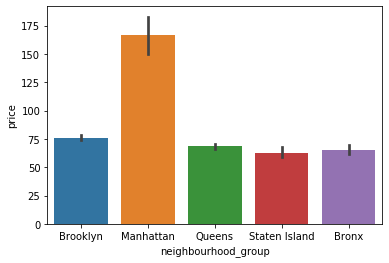

In [145]:
sns.barplot(x = private_room.neighbourhood_group, y = private_room.price)